In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')
df.head(10)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
5,6,1,0,0,0,0,1,0,0,1,...,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0
6,7,1,0,0,0,0,0,1,1,1,...,f,Pasifika,no,no,United Kingdom,no,7.984569,18 and more,Self,0
7,8,1,1,1,1,1,1,1,0,1,...,m,Black,no,yes,United States,no,13.237898,18 and more,Self,1
8,9,1,1,1,1,0,0,0,1,1,...,m,White-European,no,no,Brazil,no,-1.755774,18 and more,Self,0
9,10,0,0,0,0,0,0,0,1,0,...,f,Others,yes,no,New Zealand,no,14.922570,18 and more,Self,0


In [3]:
df.shape

(800, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [6]:
df['ethnicity'].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [7]:
df['relation'].value_counts()

relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In [8]:
df=df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

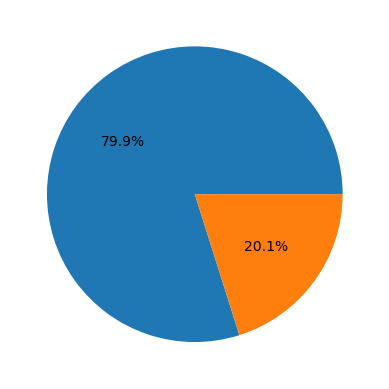

In [9]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

In [10]:
ints=[]
objects=[]
floats=[]

for col in df.columns:
    if df[col].dtype == int:
        ints.append(col)
    elif df[col].dtype == object:
        objects.append(col)
    else:
        floats.append(col)

In [11]:
print(ints)
print(objects)
print(floats)


['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jaundice', 'austim', 'used_app_before', 'Class/ASD']
['gender', 'ethnicity', 'contry_of_res', 'age_desc', 'relation']
['age', 'result']


In [12]:
ints.remove('ID')
ints.remove('Class/ASD')
print(ints)


['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jaundice', 'austim', 'used_app_before']


In [13]:
df_melted=df.melt(id_vars=['ID', 'Class/ASD'], value_vars=ints, var_name='col', value_name='value')
df_melted.head(10)

,ID,Class/ASD,col,value
0,1,0,A1_Score,1
1,2,0,A1_Score,0
2,3,1,A1_Score,1
3,4,0,A1_Score,0
4,5,0,A1_Score,0
5,6,0,A1_Score,1
6,7,0,A1_Score,1
7,8,1,A1_Score,1
8,9,0,A1_Score,1
9,10,0,A1_Score,0


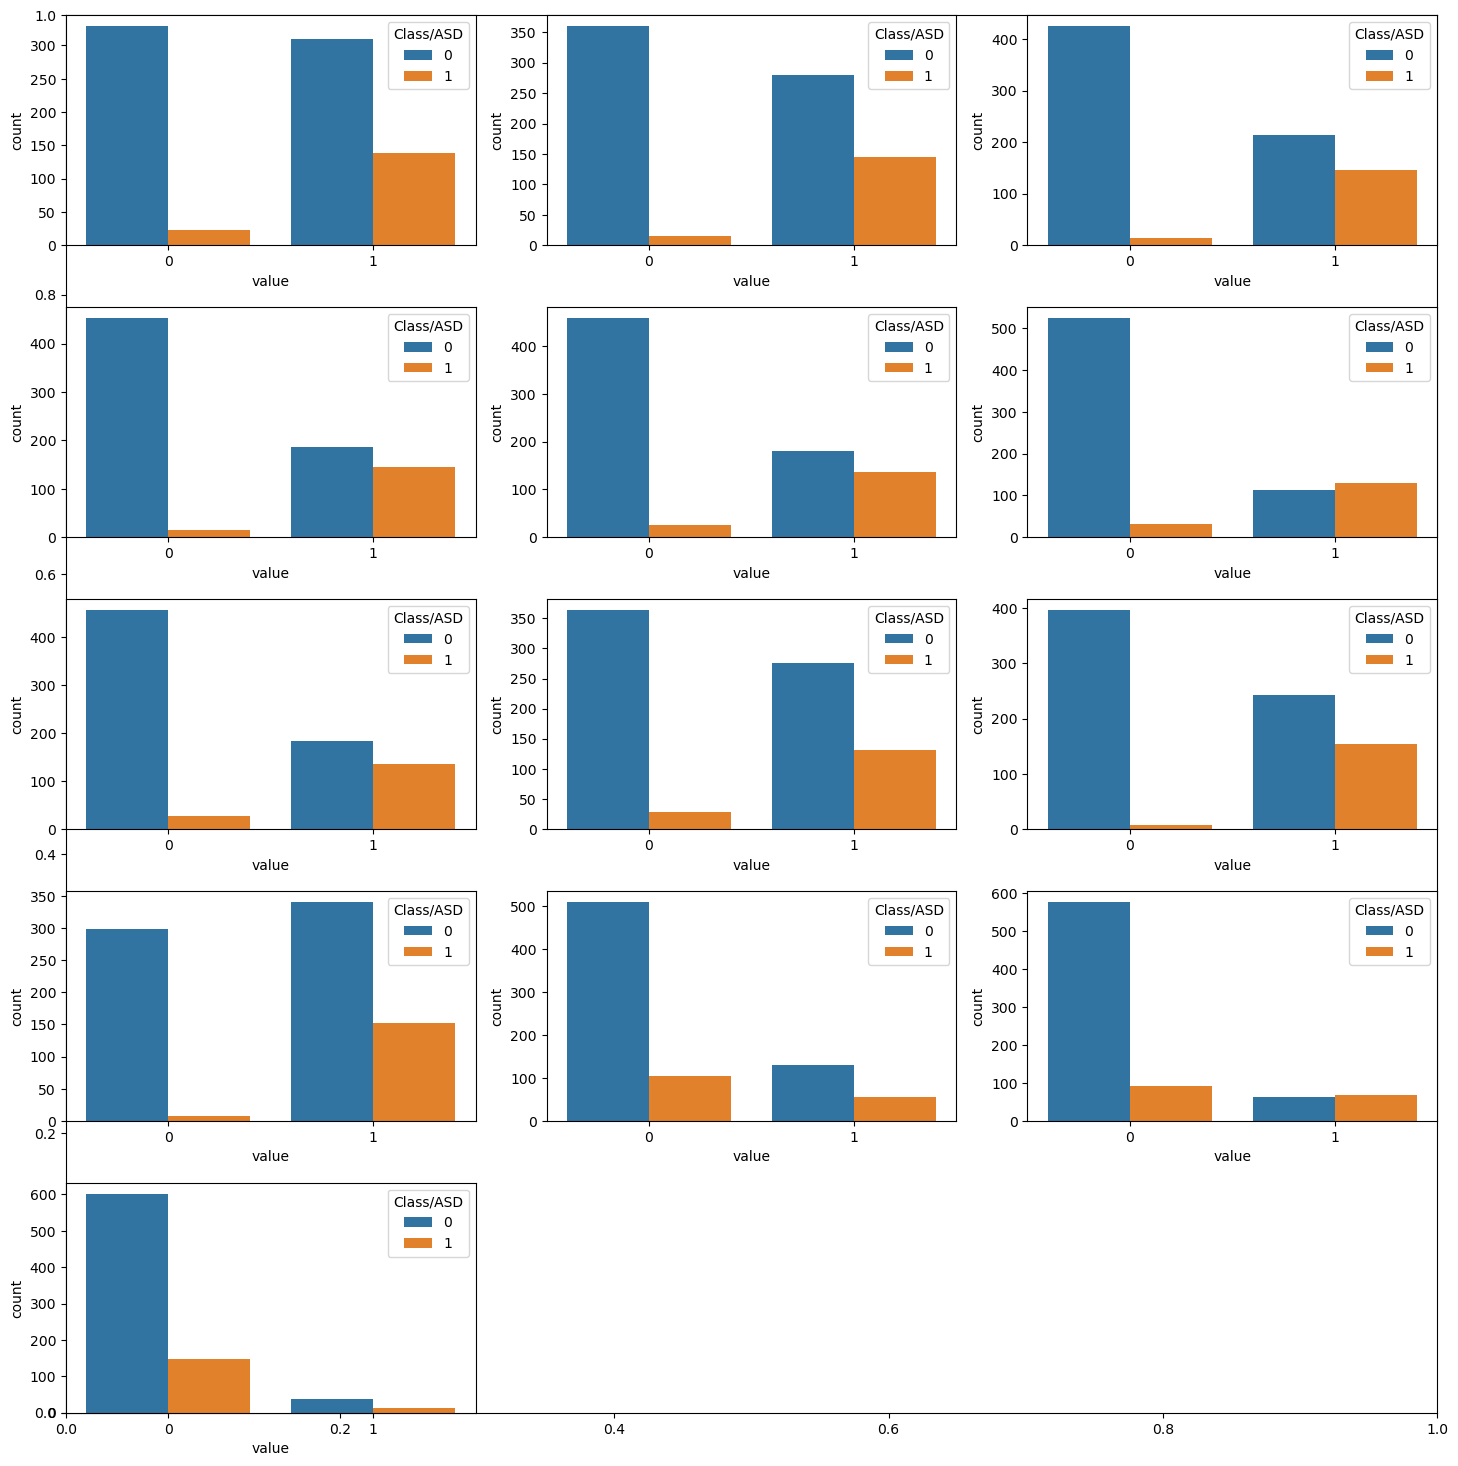

In [14]:
plt.subplots(figsize=(15,15))
for i,col in enumerate(ints):
    plt.subplot(5,3,i+1)
    sb.countplot(x='value', hue='Class/ASD', data=df_melted[df_melted['col']==col])
plt.tight_layout()
plt.show()

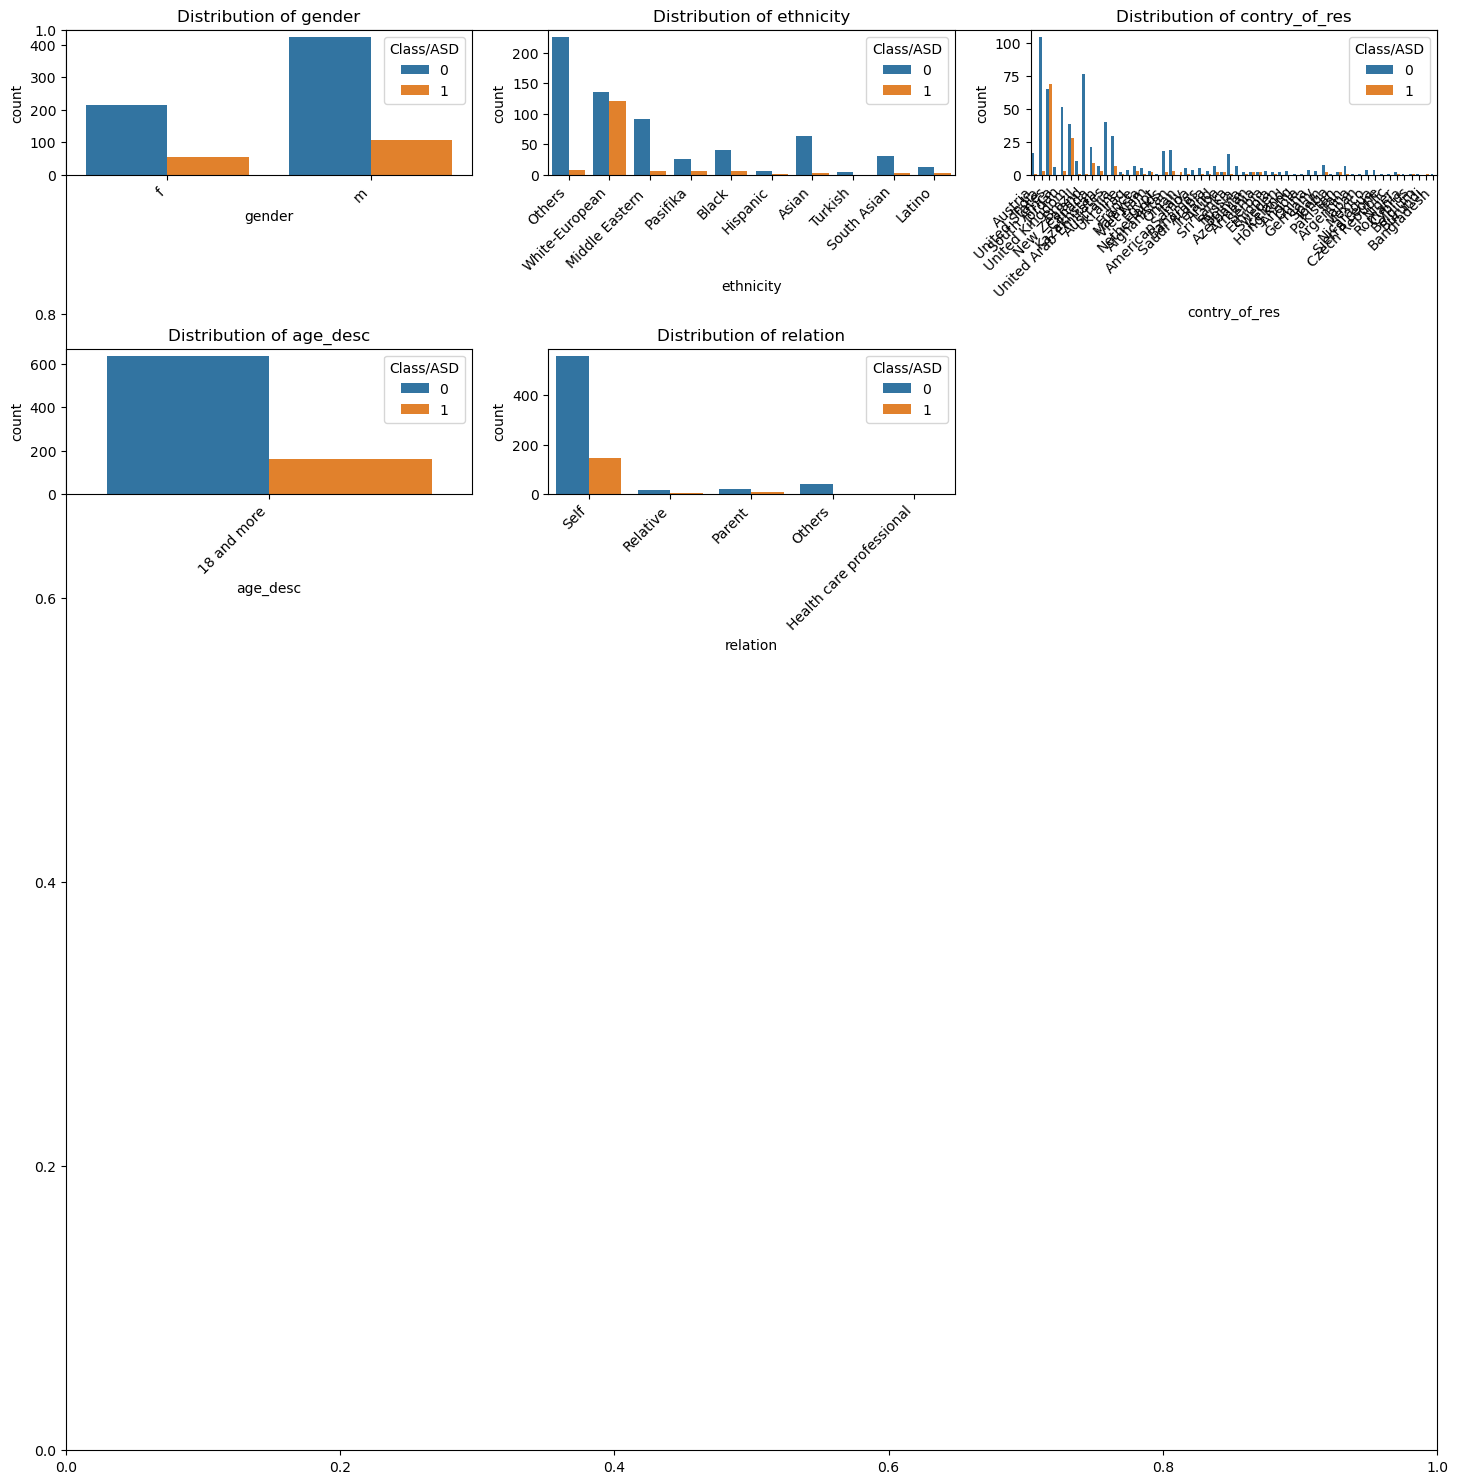

In [15]:
plt.subplots(figsize=(15,15))
for i, col in enumerate(objects):
    plt.subplot(5,3,i+1)
    sb.countplot(x=col, hue ='Class/ASD', data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

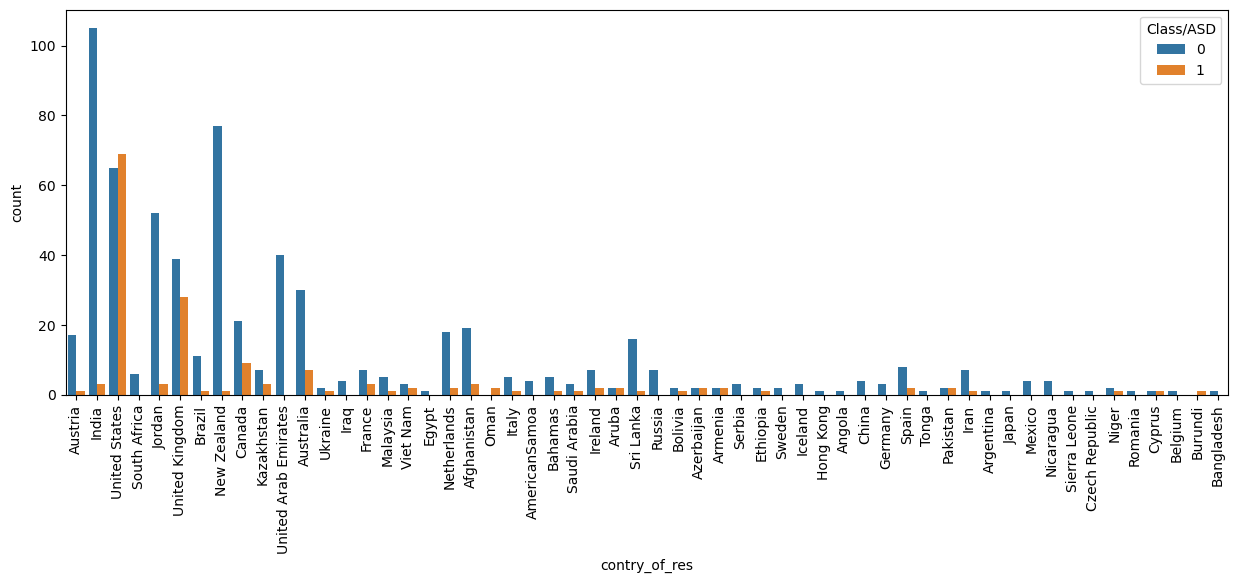

In [16]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

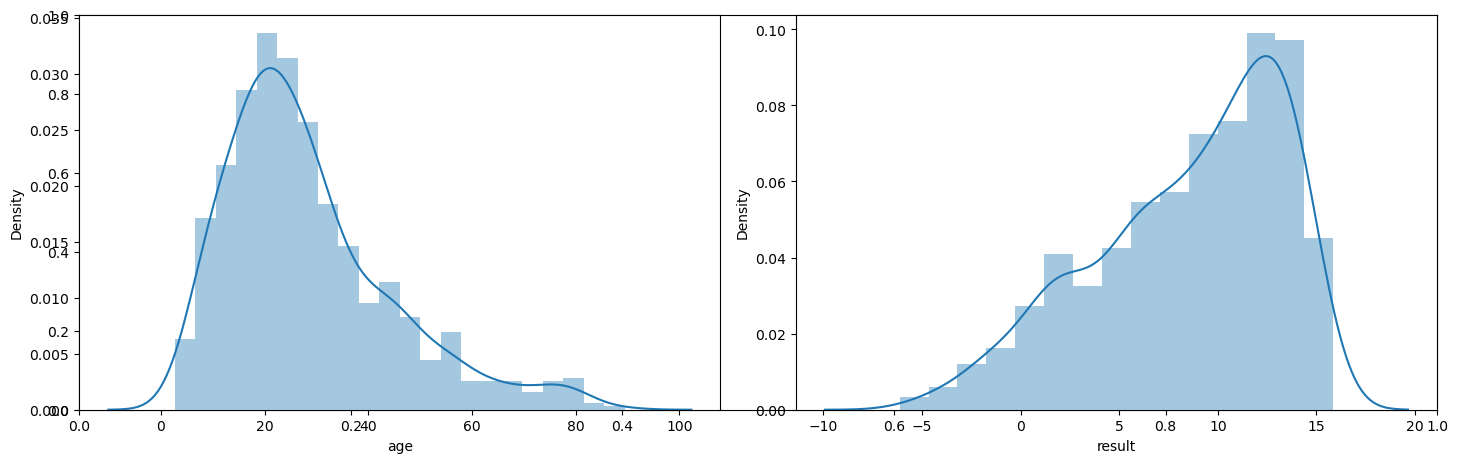

In [17]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(floats):
    plt.subplot(1,2,i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

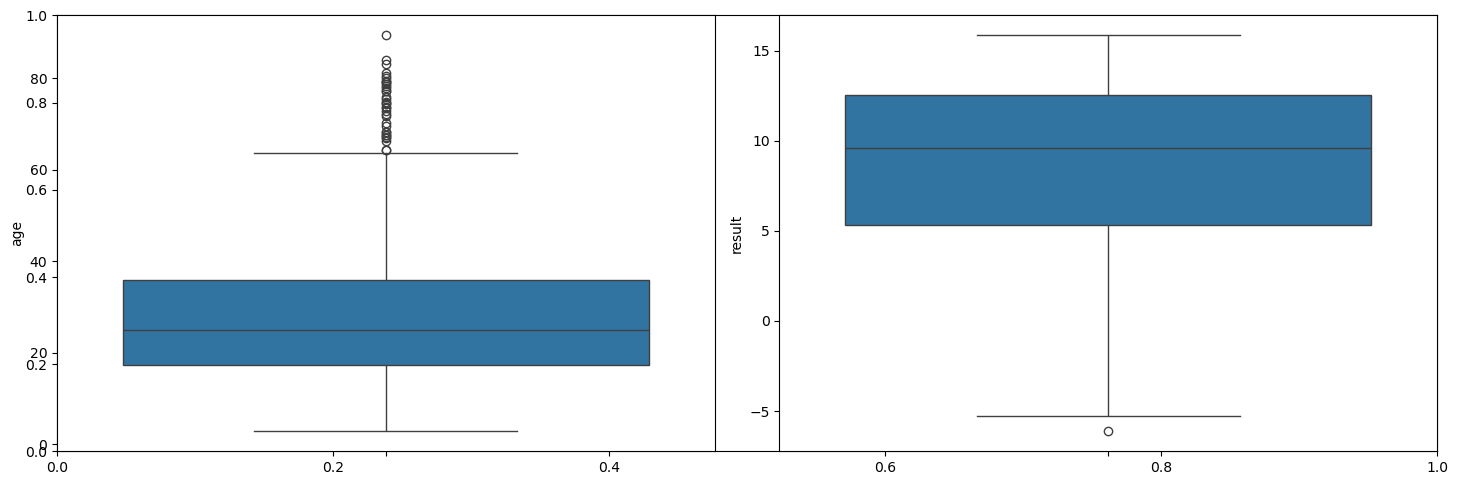

In [18]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(floats):
    plt.subplot(1,2,i+1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [19]:
df=df[df['result']>-5]
df.shape

(798, 22)

In [20]:
def convertAge(age):
    if age<4:
        return 'Toddler'
    elif age<12:
        return 'Kid'
    elif age<18:
        return 'Teenager'
    elif age<40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup']=df['age'].apply(convertAge)

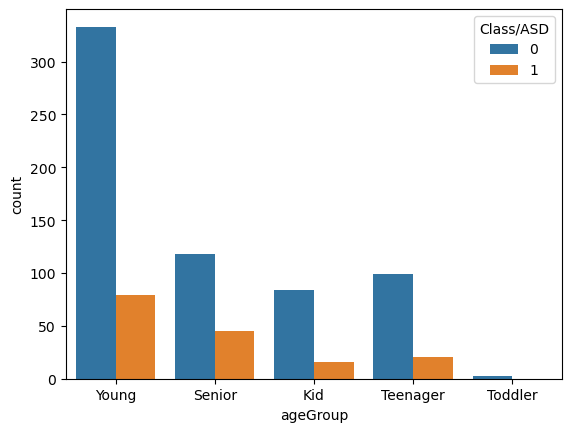

In [21]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

In [22]:
def add_feature(data):
    data['sum_score']=0
    for col in data.loc[:,'A1_Score':'A10_Score'].columns:
        data['sum_score'] +=data[col]
    data['ind'] =data['austim'] + data['used_app_before'] + data['jaundice']
    return data
df =add_feature(df)

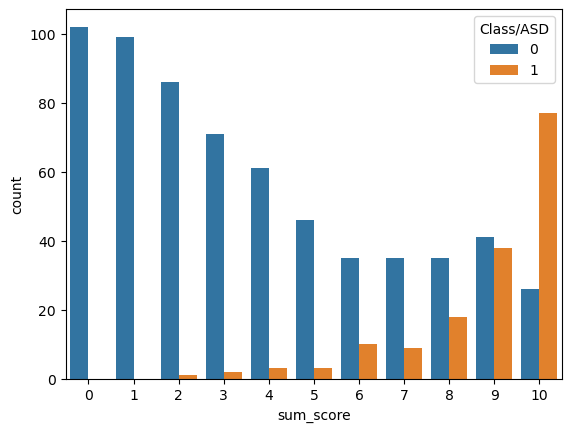

In [23]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

In [24]:
df['age'] = df['age'].apply(lambda x: np.log(x))

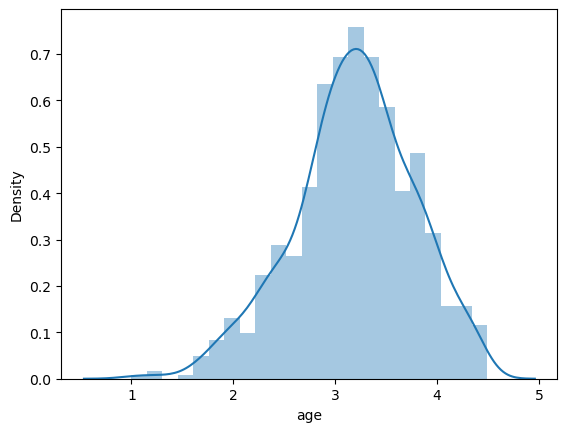

In [25]:
sb.distplot(df['age'])
plt.show()

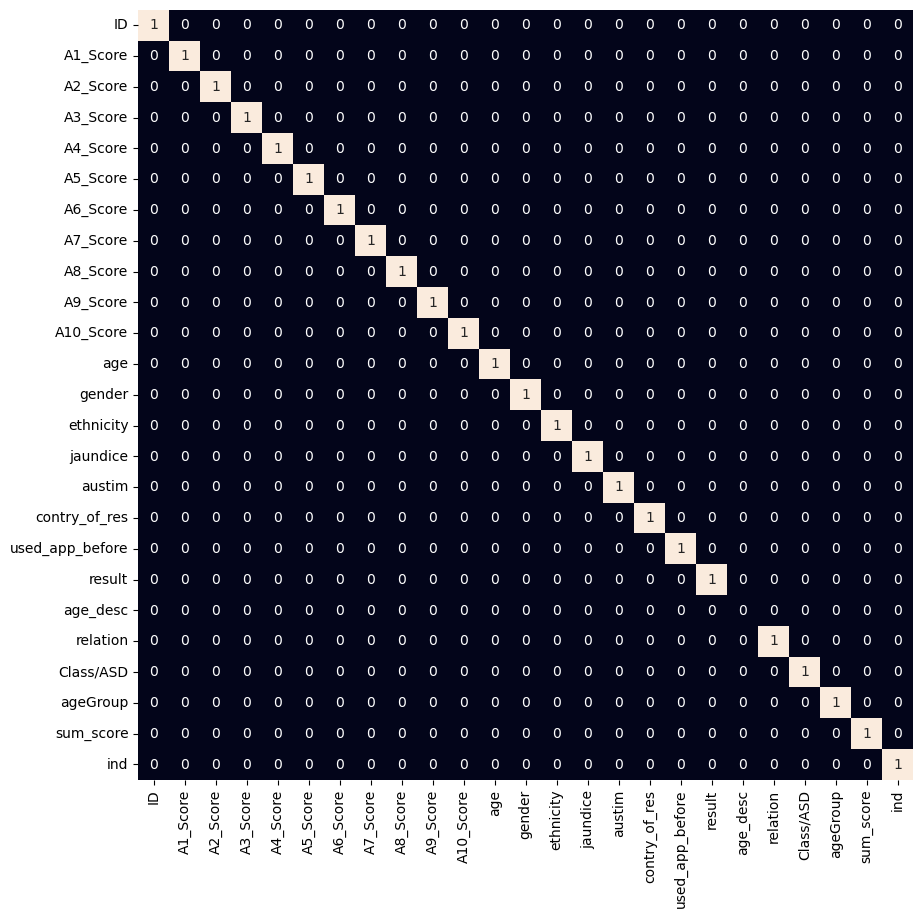

In [26]:
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col]=le.fit_transform(data[col])
    return data
df=encode_labels(df)
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [27]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features= df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

In [28]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=10)
ros=RandomOverSampler(sampling_strategy='minority', random_state=0)
X,Y= ros.fit_resample(X_train,Y_train)
X.shape,Y.shape

((1026, 20), (1026,))

In [29]:
scaler=StandardScaler()
X= scaler.fit_transform(X)
X_val= scaler.transform(X_val)

In [30]:
models=[LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
for model in models:
    model.fit(X,Y)
    print(f'{model}: ')
    print('Training Accurarcy : ', metrics.roc_auc_score(Y, model.predict(X)))
    print('Validation Accurarcy: ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
    print()

LogisticRegression(): 
Training Accurarcy :  0.8664717348927876
Validation Accurarcy:  0.782258064516129

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...): 
Training Accurarcy :  1.0
Validation Accurarcy:  0.7491039426523298

SVC(): 
Training Accurarcy :  0.9405458089668616
Validation Ac